In [28]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

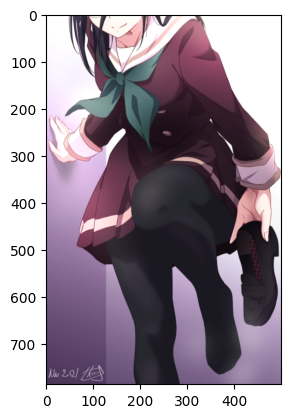

In [29]:
image = cv2.imread("../images/94147214_p0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

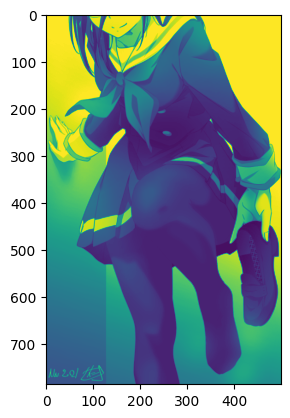

In [30]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

# 图像直方图

是指对整个图像像在灰度范围内的像素值(0~255)统计出现频率次数，据此生成的直方图，称为图像直方图-直方图。直方图反映了图像灰度的分布情况。是图像的统计学特

# calcHist 直方图计算

直方图概念是基于图像像素值，其实对图像梯度、每个像素的角度、等一切图像的属性值，我们都可以建立直方图。这个才是直方图的概念真正意义，不过是基于图像像素灰度直方图是最常见的。

直方图最常见的几个属性：
- dims 表示维度，对灰度图像来说只有一个通道值dims=1
- bins 表示在维度中子区域大小划分，bins=256，划分为256个级别
- range 表示值得范围，灰度值范围为[0~255]之间

(256, 1)
(256, 1)
(256, 1)


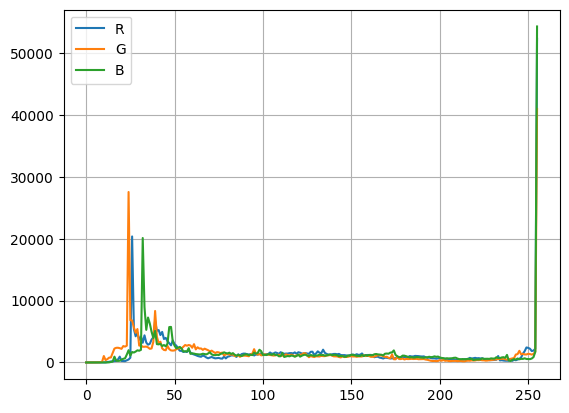

In [31]:
for i in range(3):
    hist = cv2.calcHist(
        images=[image], # 图像
        channels=[i],   # 查看哪个通道,彩色图可以用[0],[2],[2], 灰度图用[0]
        mask=None,      # 掩模图像。要统计整幅图像的直方图就把它设为 None。
        histSize=[256], # BIN 的数目
        ranges=[0, 256],# 每个像素值的像素数，即从0到255
    )
    print(hist.shape)   # 代表每个亮度值得数目
    plt.plot(hist, label=["R", "G", "B"][i])
plt.grid()
plt.legend()

## mask的应用

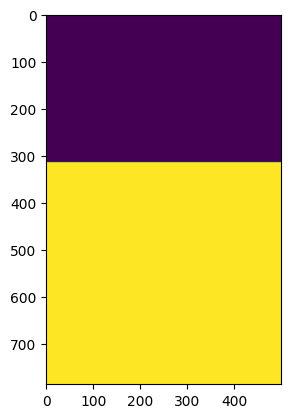

In [38]:
mask = np.zeros(image.shape[:2], np.uint8)
# 创建白色区域(透明)
mask[315:, :] = 255
plt.imshow(mask)

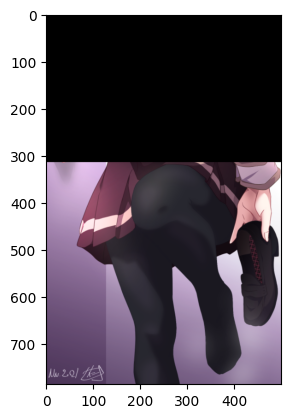

In [39]:
# 查看掩码后的图像
masked_img = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(masked_img)

(256, 1)
(256, 1)
(256, 1)


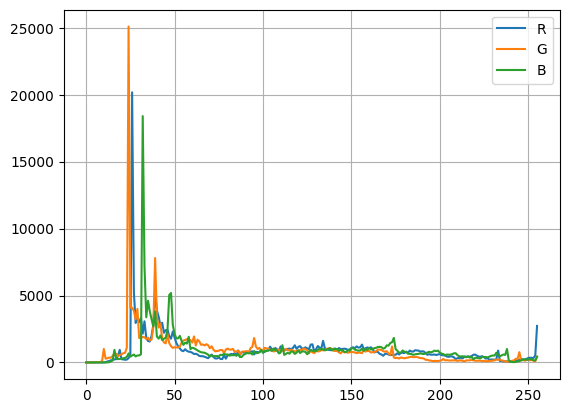

In [40]:
for i in range(3):
    hist = cv2.calcHist(
        images=[image], # 图像
        channels=[i],   # 查看哪个通道,彩色图可以用[0],[2],[2], 灰度图用[0]
        mask=mask,      # 掩模图像。要统计整幅图像的直方图就把它设为 None。
        histSize=[256], # BIN 的数目
        ranges=[0, 256],# 每个像素值的像素数，即从0到255
    )
    print(hist.shape)   # 代表每个亮度值得数目
    plt.plot(hist, label=["R", "G", "B"][i])
plt.grid()
plt.legend()

# compareHist 直方图比较方法

对输入的两张图像计算得到直方图H1与H2，归一化到相同的尺度空间

然后可以通过计算H1与H2的之间的距离得到两个直方图的相似程度进

而比较图像本身的相似程度。Opencv提供的比较方法有四种：
- Correlation     相关性比较
- Chi-Square      卡方比较
- Intersection    十字交叉性
- Bhattacharyya distance 巴氏距离

In [6]:
hist1 = cv2.calcHist(
    images=image,   # 图像
    channels=[0],   # 查看哪个通道,彩色图可以用[0],[2],[2], 灰度图用[0]
    mask=None,
    histSize=[256], # BIN 的数目
    ranges=[0, 256],# 每个像素值的像素数，即从0到255
)
hist2 = cv2.calcHist(
    images=image,   # 图像
    channels=[1],   # 查看哪个通道,彩色图可以用[0],[2],[2], 灰度图用[0]
    mask=None,
    histSize=[256], # BIN 的数目
    ranges=[0, 256],# 每个像素值的像素数，即从0到255
)
hist3 = cv2.calcHist(
    images=image,   # 图像
    channels=[2],   # 查看哪个通道,彩色图可以用[0],[2],[2], 灰度图用[0]
    mask=None,
    histSize=[256], # BIN 的数目
    ranges=[0, 256],# 每个像素值的像素数，即从0到255
)

In [7]:
cv2.compareHist(
    H1 = hist1,
    H2 = hist2,
    method=cv2.HISTCMP_INTERSECT
)

1116.0

In [8]:
cv2.compareHist(
    H1 = hist1,
    H2 = hist3,
    method=cv2.HISTCMP_INTERSECT
)

1077.0

In [9]:
cv2.compareHist(
    H1 = hist2,
    H2 = hist3,
    method=cv2.HISTCMP_INTERSECT
)

1213.0

# equalizeHist 直方图均衡化

是一种提高图像对比度的方法，拉伸图像灰度值范围

如何实现，通过上一课中的remap我们知道可以将图像灰度分布从一个分布映射到另外一个分布，然后在得到映射后的像素值即可

In [43]:
# 彩色图不行
cv2.equalizeHist(image)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


In [44]:
equalize_hist = cv2.equalizeHist(image_gray) # 必须是8-bit的单通道图像
equalize_hist.shape

(787, 500)

Text(0.5, 1.0, 'equalize_hist')

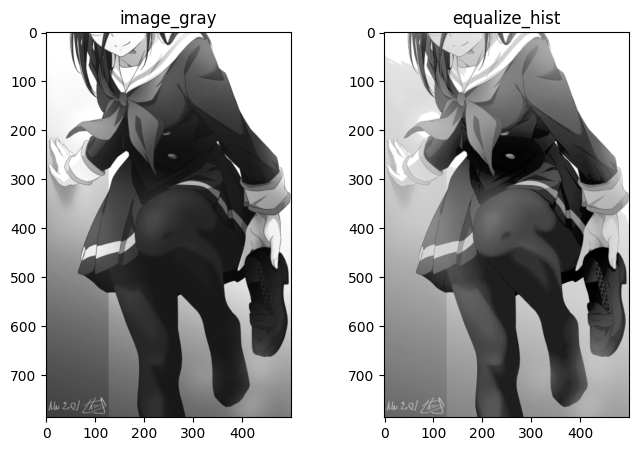

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(image_gray, cmap="gray")
axes[0].set_title("image_gray")
axes[1].imshow(equalize_hist, cmap="gray")
axes[1].set_title("equalize_hist")

# createCLAHE 自适应的直方图均衡化

将图像分成小块,每一个小块进行直方图均衡化,再使用

上述的直方图均衡，我们考虑的是图像的全局对比度。的确在进行完直方图均衡化之后，
图片背景的对比度被改变了，在猫腿这里太暗，我们丢失了很多信息，所以在许多情况下，这样做的效果并不好

为了解决这个问题， 需要使用自适应的直方图均衡化。
此时， 整幅图像会被分成很多小块，这些小块被称为“tiles”（在 OpenCV 中 tiles 的 大小默认是 8x8），
然后再对每一个小块分别进行直方图均衡化。所以在每一个的区域中， 直方图会集中在某一个小的区域中）。
如果有噪声的话，噪声会被放大。为了避免这种情况的出现要使用对比度限制。对于每个小块来说，
如果直方图中的 bin 超过对比度的上限的话，就把 其中的像素点均匀分散到其他 bins 中，然后在进行直方图均衡化。
最后，为了 去除每一个小块之间的边界，再使用双线性差值，对每一小块进行拼接。

In [50]:
# 对比度限制,分块的大小
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe

< cv2.CLAHE 000001F065678810>

In [53]:
cl1 = clahe.apply(image_gray)

Text(0.5, 1.0, 'clahe')

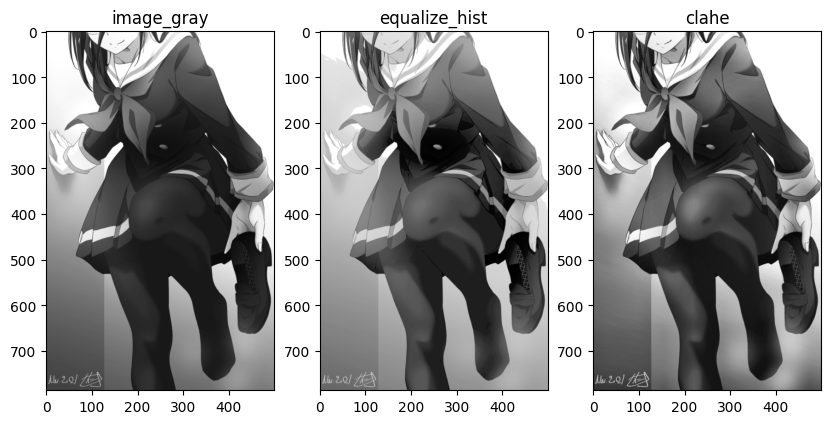

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes[0].imshow(image_gray, cmap="gray")
axes[0].set_title("image_gray")
axes[1].imshow(equalize_hist, cmap="gray")
axes[1].set_title("equalize_hist")
axes[2].imshow(cl1, cmap="gray")
axes[2].set_title("clahe")

# calcBackProject 直方图反向投影

反向投影是反映直方图模型在目标图像中的分布情况

简单点说就是用直方图模型去目标图像中寻找是否有相似的对象。通常用HSV色彩空间的HS两个通道直方图模型


In [17]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv.shape

(787, 500, 3)

In [18]:
image_hue = image_hsv[:, :, :2]
image_hue.shape

(787, 500, 2)

In [19]:
hist4 = cv2.calcHist(
    images=image_hue,   # 图像
    channels=[0],       # 查看哪个通道,彩色图可以用[0],[2],[2], 灰度图用[0]
    mask=None,
    histSize=[256],     # BIN 的数目
    ranges=[0, 256],    # 每个像素值的像素数，即从0到255
)
hist4.min(), hist4.max()

(0.0, 484.0)

In [20]:
hist4_norm = cv2.normalize(
    src=hist4,
    dst=None,
    alpha=0,
    beta=1,
    norm_type=cv2.NORM_MINMAX,
)
hist4_norm.min(), hist4_norm.max()

(0.0, 0.99999994)

In [21]:
cbp = cv2.calcBackProject(
    images=image_hue,
    channels=[0],
    hist=hist4_norm,
    ranges=[0, 256],
    scale=1
)
cbp.shape

(500, 2)

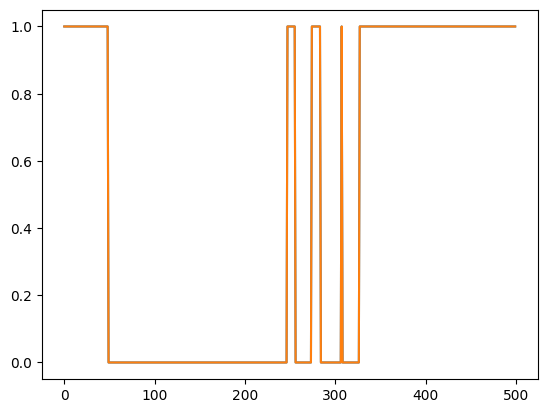

In [22]:
plt.plot(cbp)